## PREPOSS


In [ ]:
import pandas as pd

file_path = '/content/2020-2024 RR.xlsx'
data = pd.read_excel(file_path)
data.columns = ['Tanggal', 'Curah_Hujan']
data.head()

,Tanggal,Curah_Hujan
0,2020-01-01,1.5
1,2020-01-02,1
2,2020-01-03,3.5
3,2020-01-04,8.2
4,2020-01-05,1.1


In [ ]:
#konversi tanggal
try:
    data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y', errors='coerce')
    if data['Tanggal'].isna().sum() == 0:
        print("Semua data tanggal berhasil dikonversi dengan benar.")
    else:
        print(f"Ada {data['Tanggal'].isna().sum()} entri tanggal yang gagal dikonversi.")
except Exception as e:
    print("Kesalahan saat konversi tanggal:", e)

# Cek tipe datetime
if pd.api.types.is_datetime64_any_dtype(data['Tanggal']):
    print("Kolom Tanggal bertipe datetime64.")
else:
    print("Kolom Tanggal belum bertipe datetime64.")

Semua data tanggal berhasil dikonversi dengan benar.
Kolom Tanggal bertipe datetime64.


In [ ]:
expected_dates = pd.date_range(start='2020-01-01', end='2024-12-31', freq='D')
data_in_expected_range = data[data['Tanggal'].isin(expected_dates)]

missing_dates = expected_dates.difference(data_in_expected_range['Tanggal'])

if len(missing_dates) == 0:
    print("Tidak ada tanggal yang terlewat")
else:
    print(f"Ada {len(missing_dates)} tanggal yang terlewat:")
    print(missing_dates)

Ada 1 tanggal yang terlewat:
DatetimeIndex(['2024-04-01'], dtype='datetime64[ns]', freq='D')


In [ ]:
import pandas as pd
import numpy as np

missing_data = pd.DataFrame({
    "Tanggal": missing_dates,
    "Curah_Hujan": np.nan
})

data_gabungan = pd.concat([data, missing_data], ignore_index=True)
data_gabungan = data_gabungan.sort_values("Tanggal").reset_index(drop=True)
data_gabungan.head()

,Tanggal,Curah_Hujan
0,2020-01-01,1.5
1,2020-01-02,1
2,2020-01-03,3.5
3,2020-01-04,8.2
4,2020-01-05,1.1


In [ ]:
data_gabungan['Curah_Hujan_str'] = data_gabungan['Curah_Hujan'].astype(str)

non_numeric_mask = pd.to_numeric(data_gabungan['Curah_Hujan'], errors='coerce').isna() & data_gabungan['Curah_Hujan'].notna()
non_numeric_values = data_gabungan.loc[non_numeric_mask, 'Curah_Hujan']

count_8888 = (data_gabungan['Curah_Hujan'] == 8888).sum()
count_9999 = (data_gabungan['Curah_Hujan'] == 9999).sum()

print(f"Jumlah data non-numerik     : {non_numeric_values.shape[0]}")
print("Nilai non-numerik unik      :", non_numeric_values.unique())

count_dash = (data_gabungan['Curah_Hujan_str'] == '-').sum()
print(f"Jumlah nilai '-'            : {count_dash}")

print(f"Jumlah data bernilai 8888   : {count_8888}")
print(f"Jumlah data bernilai 9999   : {count_9999}")

Jumlah data non-numerik     : 269
Nilai non-numerik unik      : ['-' '3,8' '21,2' '1,5' '2,2' '2,1' '78,1' '26,5' '3,3' '5,1' '18,3'
 '17,2' '23,6' '36,3' '5,5' '4,3' '27,2' '16,6' '60,3' '33,8' '0,3' '7,8'
 '0,2' '84,5' '19,2' '0,8' '0,5' '0,1' '17,9' '12,5' '0,4' '10,8' '14,5'
 '2,8' '21,6' '14,7' '4,2' '5,7' '79,5' '78,5' '50,3' '7,9' '1,7' '19,5'
 '5,3' '2,5' '4,5' '11,3' '0,9' '35,8' '32,4' '16,5' '30,2' '8,1' '6,9'
 '25,5' '12,1' '13,5' '24,2' '6,4' '7,3' '6,8' '45,7' '31,1' '38,9' '14,1'
 '62,5' '56,8' '37,3' '44,4' '4,6' '10,5' '96,4' '14,6' '22,9']
Jumlah nilai '-'            : 176
Jumlah data bernilai 8888   : 109
Jumlah data bernilai 9999   : 0


In [ ]:
data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].astype(str)

data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].replace('-', pd.NA)

data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].str.replace(',', '.', regex=False)
data_gabungan['Curah_Hujan'] = pd.to_numeric(data_gabungan['Curah_Hujan'], errors='coerce')

In [ ]:
non_numeric_mask = pd.to_numeric(data_gabungan['Curah_Hujan'], errors='coerce').isna() & data_gabungan['Curah_Hujan'].notna()
non_numeric_values = data_gabungan.loc[non_numeric_mask, 'Curah_Hujan']

print(f"Jumlah data non-numerik: {non_numeric_values.shape[0]}")
print("Nilai non-numerik unik:", non_numeric_values.unique() )

Jumlah data non-numerik: 0
Nilai non-numerik unik: []


In [ ]:
data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].replace([8888], pd.NA)

nan_count = data_gabungan['Curah_Hujan'].isna().sum()
print(f"Jumlah data NaN setelah mengganti 8888: {nan_count}")

Jumlah data NaN setelah mengganti 8888: 286


Jumlah total nilai NaN didapatkan dari :

1. nilai null dari data tanggal yang hilang sebanyak 1
2. nilai '-' sebanyak 176
3. nilai data 8888 sebanyak 109



In [ ]:
non_numeric = pd.to_numeric(data_gabungan['Curah_Hujan'], errors='coerce').isna() & data_gabungan['Curah_Hujan'].notna()

if non_numeric.sum() == 0:
    print("\nSemua nilai di kolom Curah_Hujan bertipe numerik.")
else:
    print(f"\n Ada {non_numeric.sum()} nilai di kolom Curah_Hujan yang bukan numerik.")
    print("Berikut contoh data yang bermasalah:")
    print(data.loc[non_numeric, 'Curah_Hujan'])


Semua nilai di kolom Curah_Hujan bertipe numerik.


##MISSING VALUE

In [ ]:
data_gabungan['Curah_Hujan'] = pd.to_numeric(data_gabungan['Curah_Hujan'], errors='coerce')

# Rolling average 7 hari (centered)
rolling_avg = data_gabungan['Curah_Hujan'].rolling(window=7, center=True, min_periods=1).mean()

data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].fillna(rolling_avg)
data_gabungan['Curah_Hujan'].isna().sum()
data_gabungan.head()

,Tanggal,Curah_Hujan,Curah_Hujan_str
0,2020-01-01,1.5,1.5
1,2020-01-02,1.0,1
2,2020-01-03,3.5,3.5
3,2020-01-04,8.2,8.2
4,2020-01-05,1.1,1.1


In [ ]:
data_gabungan.drop(columns='Curah_Hujan_str', inplace=True)
data_gabungan['Curah_Hujan'] = data_gabungan['Curah_Hujan'].astype(float).round(1)
data_gabungan

,Tanggal,Curah_Hujan
0,2020-01-01,1.5
1,2020-01-02,1.0
2,2020-01-03,3.5
3,2020-01-04,8.2
4,2020-01-05,1.1
...,...,...
1822,2024-12-27,0.0
1823,2024-12-28,32.1
1824,2024-12-29,22.9
1825,2024-12-30,16.5


In [ ]:
data_gabungan.to_excel("data_gabungan_bersih.xlsx", index=False)

## EDA

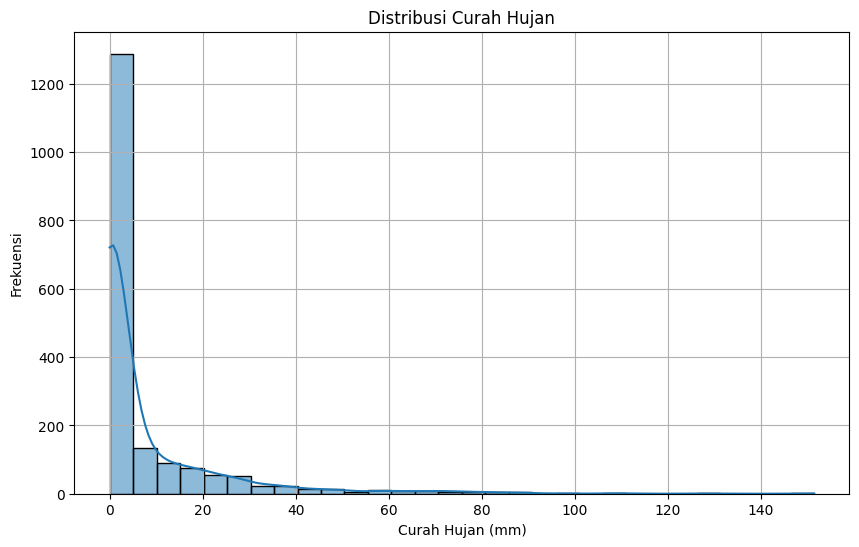

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('data_gabungan_bersih.xlsx')

plt.figure(figsize=(10, 6))
sns.histplot(data['Curah_Hujan'], bins=30, kde=True)
plt.title('Distribusi Curah Hujan')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

In [ ]:
#Statistik
print(data['Curah_Hujan'].describe())
print("Modus:", data['Curah_Hujan'].mode().values)
print("Varians:", data['Curah_Hujan'].var())
print("Rentang:", data['Curah_Hujan'].max() - data['Curah_Hujan'].min())
print("Skewness:", data['Curah_Hujan'].skew())
print("Kurtosis:", data['Curah_Hujan'].kurt())

count    1827.000000
mean        7.567214
std        15.591644
min         0.000000
25%         0.000000
50%         0.000000
75%         7.900000
max       151.500000
Name: Curah_Hujan, dtype: float64
Modus: [0.]
Varians: 243.09936808286528
Rentang: 151.5
Skewness: 3.3078478718297846
Kurtosis: 14.181389473058012


<ipython-input-16-971306e4a3a3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('Tanggal').resample('M')['Curah_Hujan'].sum().plot()


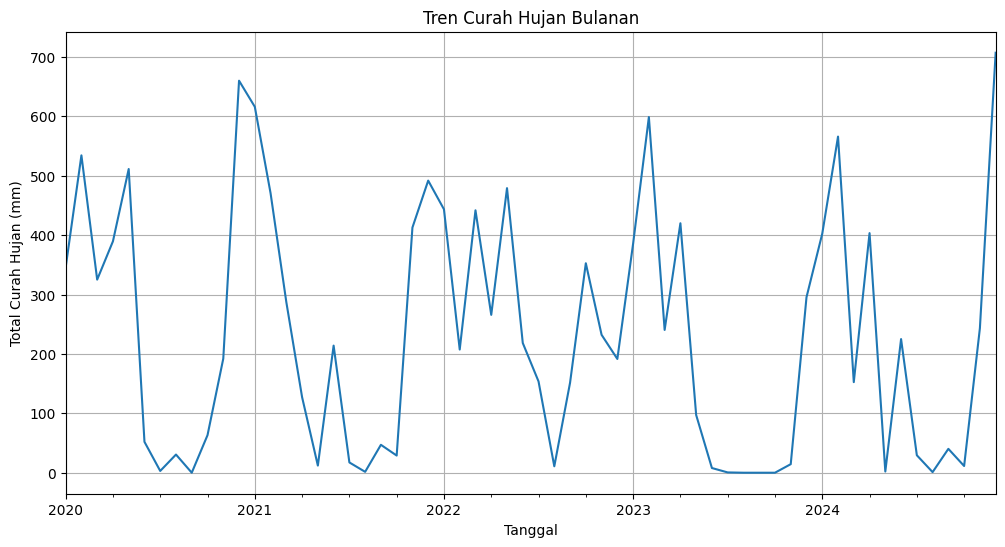

In [ ]:
#Tren Musiman
plt.figure(figsize=(12, 6))
data.set_index('Tanggal').resample('M')['Curah_Hujan'].sum().plot()
plt.title('Tren Curah Hujan Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Total Curah Hujan (mm)')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

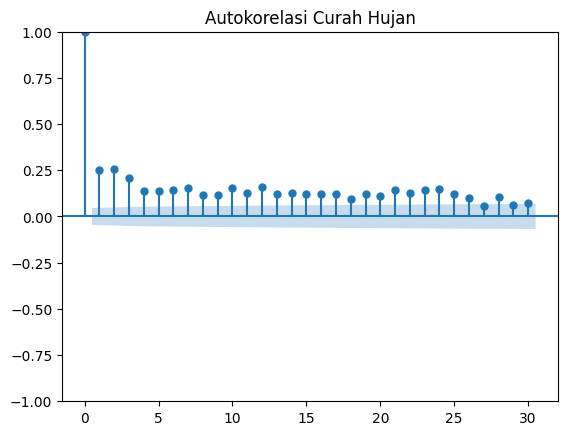

In [ ]:
# Analisis Autokorelasi
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data['Curah_Hujan'], lags=30)
plt.title('Autokorelasi Curah Hujan')
plt.show()

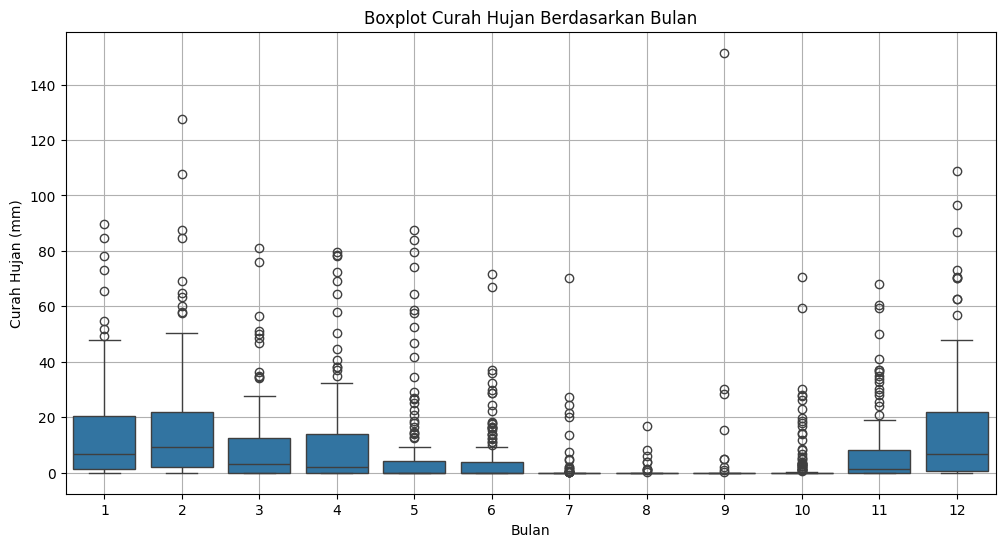

In [ ]:
# Boxplot berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Tanggal'].dt.month, y='Curah_Hujan', data=data)  # Extract month directly
plt.title('Boxplot Curah Hujan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan (mm)')
plt.grid()
plt.show()

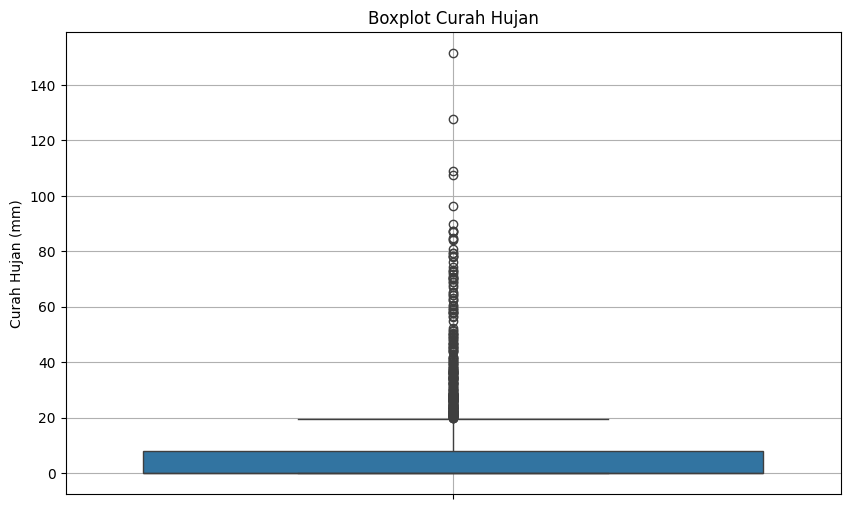

In [ ]:
# **1. Menggunakan Boxplot untuk Mendeteksi Outliers**
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Curah_Hujan'])
plt.title('Boxplot Curah Hujan')
plt.ylabel('Curah Hujan (mm)')
plt.grid()
plt.show()

In [ ]:
Q1 = data['Curah_Hujan'].quantile(0.25)
Q3 = data['Curah_Hujan'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Curah_Hujan'] < lower_bound) | (data['Curah_Hujan'] > upper_bound)]

print("Jumlah outliers:", outliers.shape[0])
print(outliers)

print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)

Jumlah outliers: 241
        Tanggal  Curah_Hujan
6    2020-01-07         39.5
8    2020-01-09         49.2
10   2020-01-11         27.1
18   2020-01-19         26.0
20   2020-01-21         45.0
...         ...          ...
1817 2024-12-22         44.4
1820 2024-12-25         96.4
1823 2024-12-28         32.1
1824 2024-12-29         22.9
1826 2024-12-31         26.5

[241 rows x 2 columns]
Batas bawah: -11.850000000000001
Batas atas: 19.75


#HANDLING OUTLIERS

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

file_path2 = '/content/data_gabungan_bersih.xlsx'
data2 = pd.read_excel(file_path2)
data_hujan = data2['Curah_Hujan']

# Terapkan Winsorizing (potong 5% bawah dan 5% atas)
data_hujan_winsor = winsorize(data_hujan, limits=[0.05, 0.05])

In [ ]:
data_hujan_winsor

masked_array(data=[ 1.5,  1. ,  3.5, ..., 22.9, 16.5, 26.5],
             mask=False,
       fill_value=1e+20)

## Uji Stasioner

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t

file_path2 = "data_gabungan_bersih.xlsx"
data2 = pd.read_excel(file_path2, sheet_name="Sheet1")

y = data2['Curah_Hujan']
dy = np.diff(y)  # ΔYt
yt_1 = y[:-1]    # Yt-1

# df regresi
df = pd.DataFrame({'dy': dy, 'yt_1': yt_1})

# Regress dy terhadap yt-1 (dengan intercept)
X = sm.add_constant(df['yt_1'])
model = sm.OLS(df['dy'], X).fit()

# parameter dan t-statistik
theta_hat = model.params['yt_1']
SE_theta = model.bse['yt_1']
tau = theta_hat / SE_theta  # Statistik τ

dfree = len(dy) - 2
p_value = t.cdf(tau, df=dfree)  # P-value sisi kiri karena uji satu arah
n = len(dy)

print(f"θ̂: {theta_hat}")
print(f"SE(θ̂): {SE_theta}")
print(f"τ (t-statistik): {tau}")
print(f"nilai derajat bebas: {dfree}")
print(f"p-value: {p_value:.5f}")
print(f"tau > t: {tau > t.ppf(0.05, n)}")

alpha = 0.05
if tau > t.ppf(alpha, n):
    print("Tolak H0 → Data stasioner")
else:
    print("Gagal Tolak  H0 → Data tidak stasioner")

θ̂: -0.7483817082111573
SE(θ̂): 0.022670090466328688
τ (t-statistik): -33.011853628141
nilai derajat bebas: 1824
p-value: 0.00000
tau > t: False
Gagal Tolak  H0 → Data tidak stasioner


## Differencing - ACF - PACF

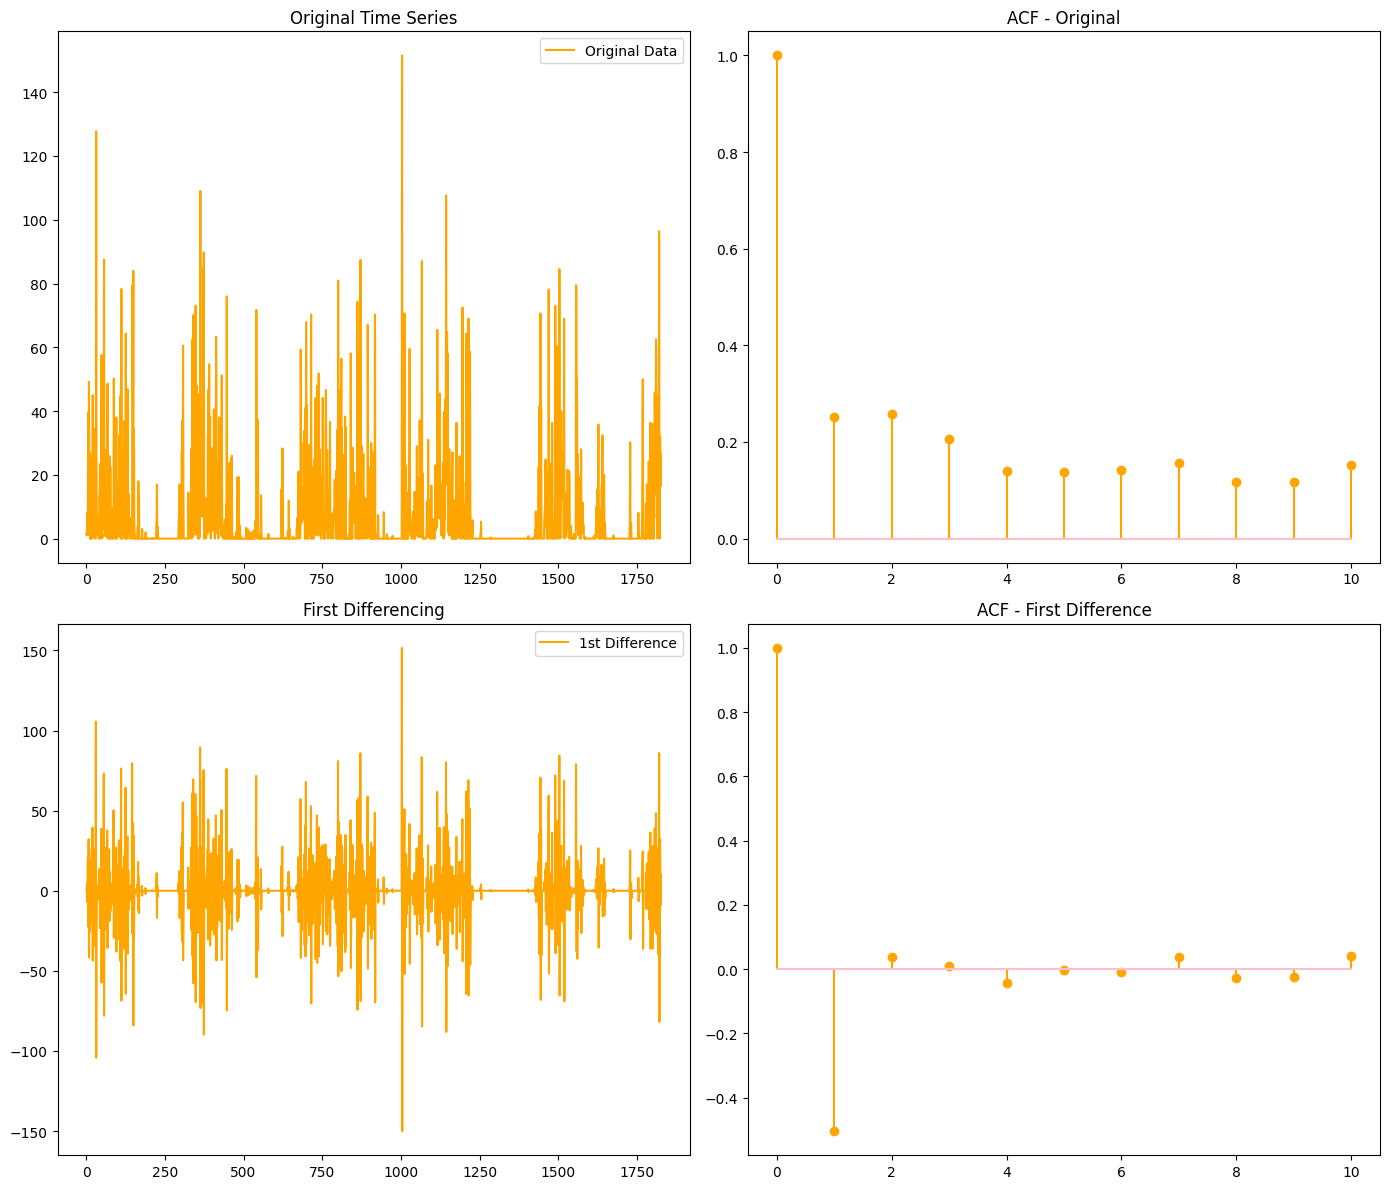

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

file_path = "data_gabungan_bersih.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

ts = df['Curah_Hujan']

diff1 = ts.diff().dropna()
diff2 = diff1.diff().dropna()

acf_orig = acf(ts, nlags=10)
acf_1st = acf(diff1, nlags=10)
# acf_2nd = acf(diff2, nlags=10)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Original
axs[0, 0].plot(ts, label='Original Data', color='orange')
axs[0, 0].set_title("Original Time Series")
axs[0, 0].legend()
axs[0, 1].stem(range(len(acf_orig)), acf_orig, linefmt='orange', markerfmt='o', basefmt='pink')
axs[0, 1].set_title("ACF - Original")

# First difference
axs[1, 0].plot(diff1, label='1st Difference', color='orange')
axs[1, 0].set_title("First Differencing")
axs[1, 0].legend()
axs[1, 1].stem(range(len(acf_1st)), acf_1st, linefmt='orange', markerfmt='o', basefmt='pink')
axs[1, 1].set_title("ACF - First Difference")

# # Second difference
# axs[2, 0].plot(diff2, label='2nd Difference', color='green')
# axs[2, 0].set_title("Second Differencing")
# axs[2, 0].legend()
# axs[2, 1].stem(range(len(acf_2nd)), acf_2nd, linefmt='green', markerfmt='o', basefmt='pink')
# axs[2, 1].set_title("ACF - Second Difference")

plt.tight_layout()
plt.show()

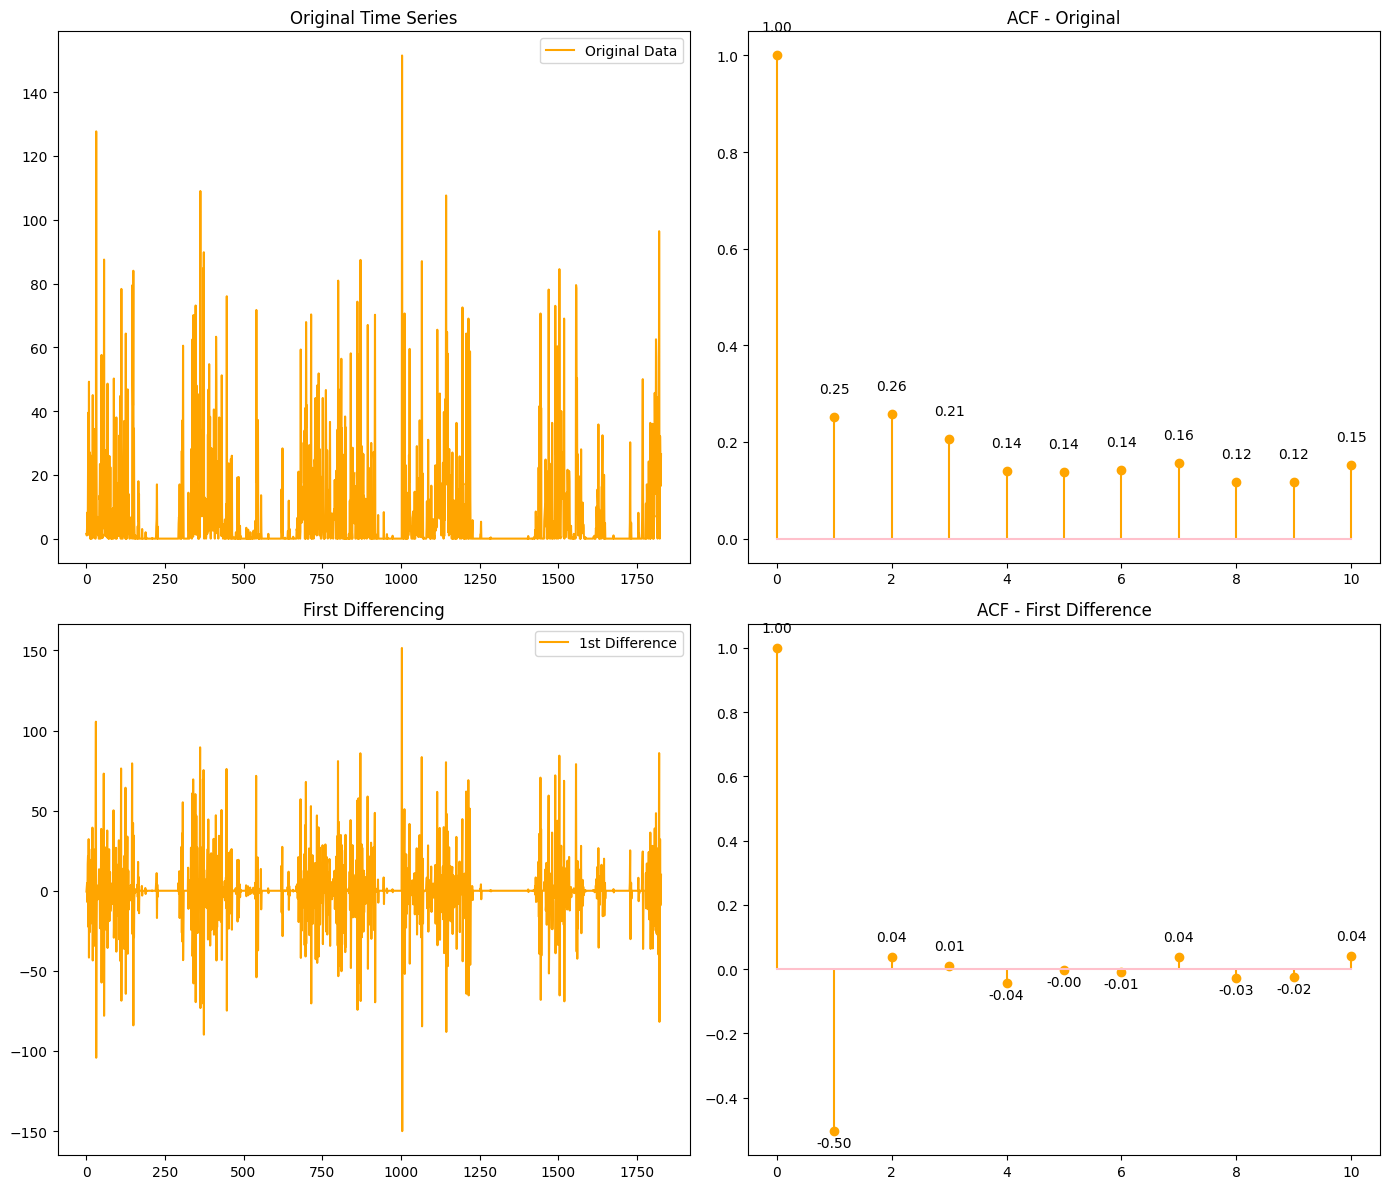

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

file_path = "data_gabungan_bersih.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

ts = df['Curah_Hujan']

diff1 = ts.diff().dropna()
diff2 = diff1.diff().dropna()

acf_orig = acf(ts, nlags=10)
acf_1st = acf(diff1, nlags=10)
# acf_2nd = acf(diff2, nlags=10)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

def annotate_stem(ax, acf_values, color='black'):
    for i, val in enumerate(acf_values):
        ax.text(i, val + 0.05 * np.sign(val), f'{val:.2f}', ha='center', color=color)

# Original
axs[0, 0].plot(ts, label='Original Data', color='orange')
axs[0, 0].set_title("Original Time Series")
axs[0, 0].legend()
axs[0, 1].stem(range(len(acf_orig)), acf_orig, linefmt='orange', markerfmt='o', basefmt='pink')
axs[0, 1].set_title("ACF - Original")
annotate_stem(axs[0, 1], acf_orig)

# First difference
axs[1, 0].plot(diff1, label='1st Difference', color='orange')
axs[1, 0].set_title("First Differencing")
axs[1, 0].legend()
axs[1, 1].stem(range(len(acf_1st)), acf_1st, linefmt='orange', markerfmt='o', basefmt='pink')
axs[1, 1].set_title("ACF - First Difference")
annotate_stem(axs[1, 1], acf_1st)

# # Second difference
# axs[2, 0].plot(diff2, label='2nd Difference', color='green')
# axs[2, 0].set_title("Second Differencing")
# axs[2, 0].legend()
# axs[2, 1].stem(range(len(acf_2nd)), acf_2nd, linefmt='green', markerfmt='o', basefmt='pink')
# axs[2, 1].set_title("ACF - Second Difference")
# annotate_stem(axs[2, 1], acf_2nd)

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

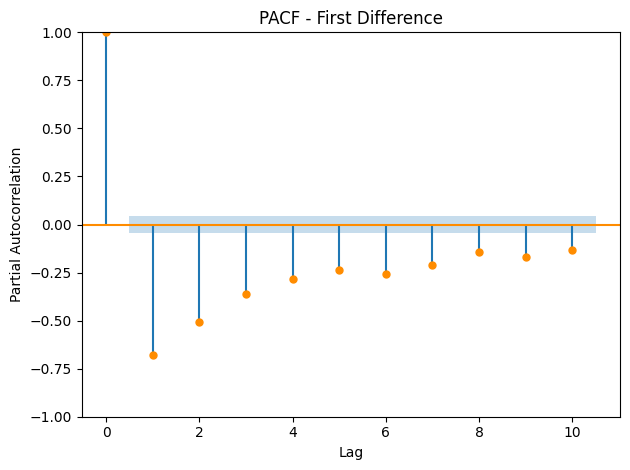

In [ ]:
!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 5))
plot_pacf(diff2, lags=10, method='ywmle', color='darkorange')
plt.title('PACF - First Difference')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.tight_layout()
plt.show()

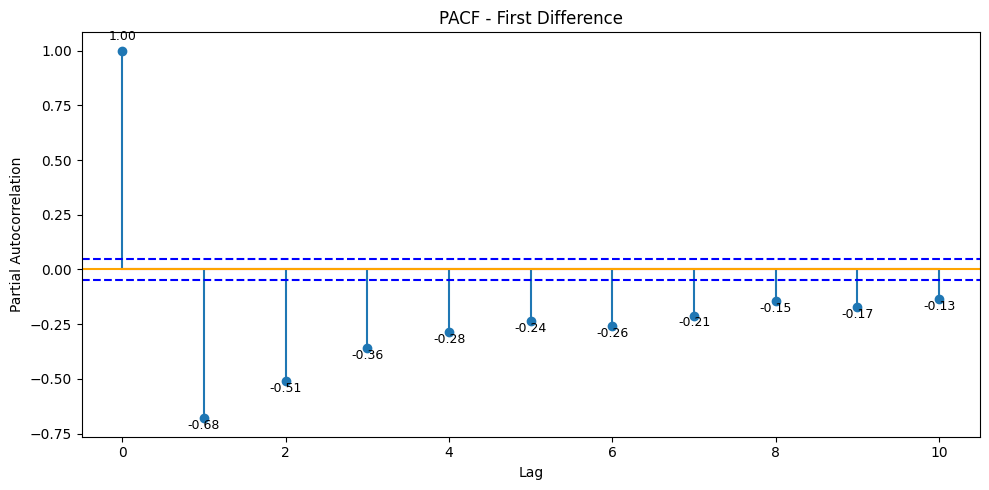

In [ ]:
!pip install statsmodels matplotlib

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import numpy as np

pacf_values = pacf(diff2, nlags=10, method='ywmle')

plt.figure(figsize=(10, 5))
bars = plt.stem(range(len(pacf_values)), pacf_values) # Removed use_line_collection=True
plt.title('PACF - First Difference')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.axhline(y=0, color='orange')

# batas signifikansi (95%)
conf = 1.96 / np.sqrt(len(diff2))
plt.axhline(y=conf, color='blue', linestyle='--')
plt.axhline(y=-conf, color='blue', linestyle='--')

for i, val in enumerate(pacf_values):
    plt.text(i, val + 0.05 * np.sign(val), f'{val:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

#SARIMA

2024-12-27     0.0
2024-12-28    32.1
2024-12-29    22.9
2024-12-30    16.5
2024-12-31    26.5
Freq: D, dtype: float64
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1827
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 91)   Log Likelihood               -7259.878
Date:                            Sun, 11 May 2025   AIC                          14529.756
Time:                                    08:02:54   BIC                          14557.050
Sample:                                01-01-2020   HQIC                         14539.850
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

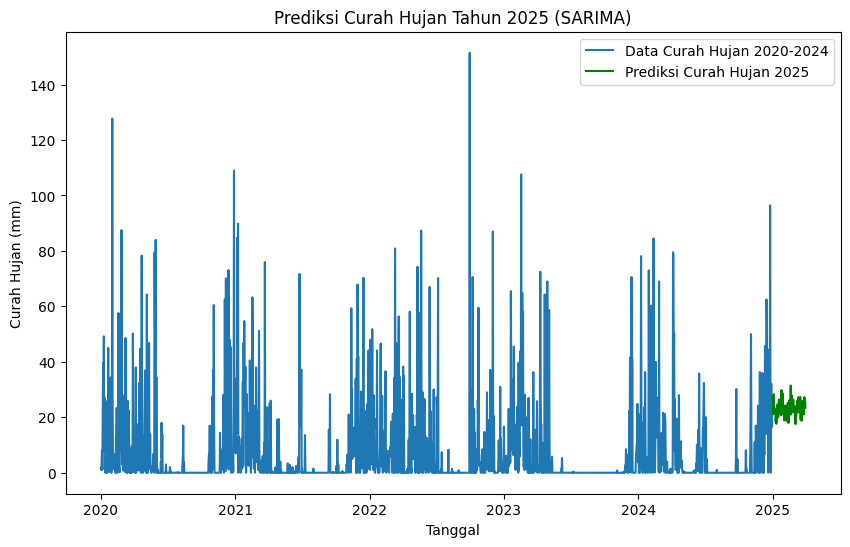

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path2 = '/content/data_gabungan_bersih.xlsx'
data2 = pd.read_excel(file_path2)

data_hujan = data2['Curah_Hujan']  # Select the 'Curah_Hujan' column
dates = pd.date_range(start='2020-01-01', periods=len(data_hujan), freq='D')

df_hujan = pd.Series(data_hujan.values, index=dates)
print(df_hujan.tail())

train = df_hujan

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=365)

forecast_dates = pd.date_range(start='2025-01-01', periods=90, freq='D')
forecast_series = pd.Series(forecast, index=forecast_dates)

plt.figure(figsize=(10,6))
plt.plot(df_hujan, label='Data Curah Hujan 2020-2024')
plt.plot(forecast_series, label='Prediksi Curah Hujan 2025', color='green')
plt.legend()
plt.title('Prediksi Curah Hujan Tahun 2025 (SARIMA)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.show()